In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt


In [ ]:
data=pd.read_csv('Melbourne_housing_FULL.csv')
data.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [ ]:
data.shape

(34857, 21)

**This data set contain 21 columns for the sake of univariate analysis let us use just one column of data='Distance' **

In [ ]:
disdata=data['Distance']

In [ ]:
len(disdata)

34857

This first step is to check if the data has any missing values. some plots will not work in the presence of missing values. So we need to take care of them.

In [ ]:
disdata.isnull().sum()

1

Out of 34857 only 1 missing value is present so we drop the one missing value

In [ ]:
disdata=disdata.dropna()# drops all missing valuse in the data

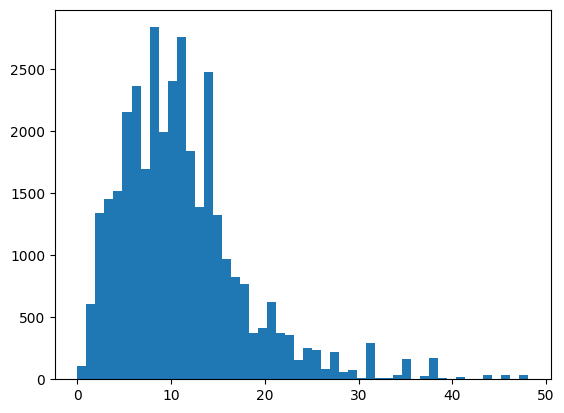

In [ ]:
#The following code plots a histrogram using the matplotlib package
#The bins argument creates class intervals. In this case we are creating 50 such intervals
plt.hist(disdata, bins=50)
plt.show()

<ipython-input-14-afe0152c8105>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(disdata)# plots a frequency ploygon superimposed on a histo gram using the seaborn package.


<Axes: xlabel='Distance', ylabel='Density'>

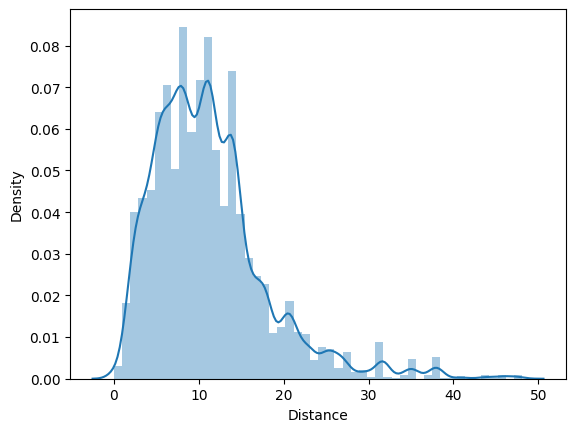

In [ ]:
#distribution plot
sns.distplot(disdata)# plots a frequency ploygon superimposed on a histo gram using the seaborn package.
#seaborn automatically creates class intervals. The number of bins can also be manually set.

<ipython-input-15-a9363327eaf4>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(disdata,hist=False)# plots a frequency ploygon superimposed on a histo gram using the seaborn package.


<Axes: xlabel='Distance', ylabel='Density'>

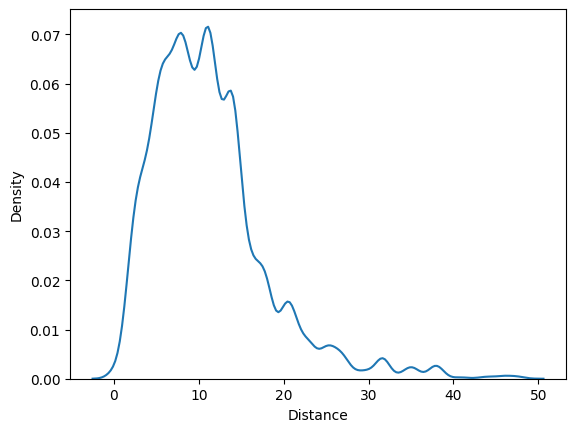

In [ ]:
sns.distplot(disdata,hist=False)# adding an argument to plot only frequency ploygon.

<Axes: ylabel='Distance'>

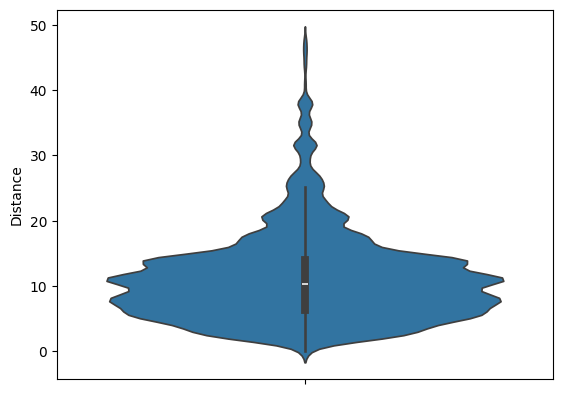

In [ ]:
sns.violinplot(disdata) # plots a violin pit using the seaborn package

Now Let us have a closer look at the distribution by plotting a simple histogram with 10 bins.

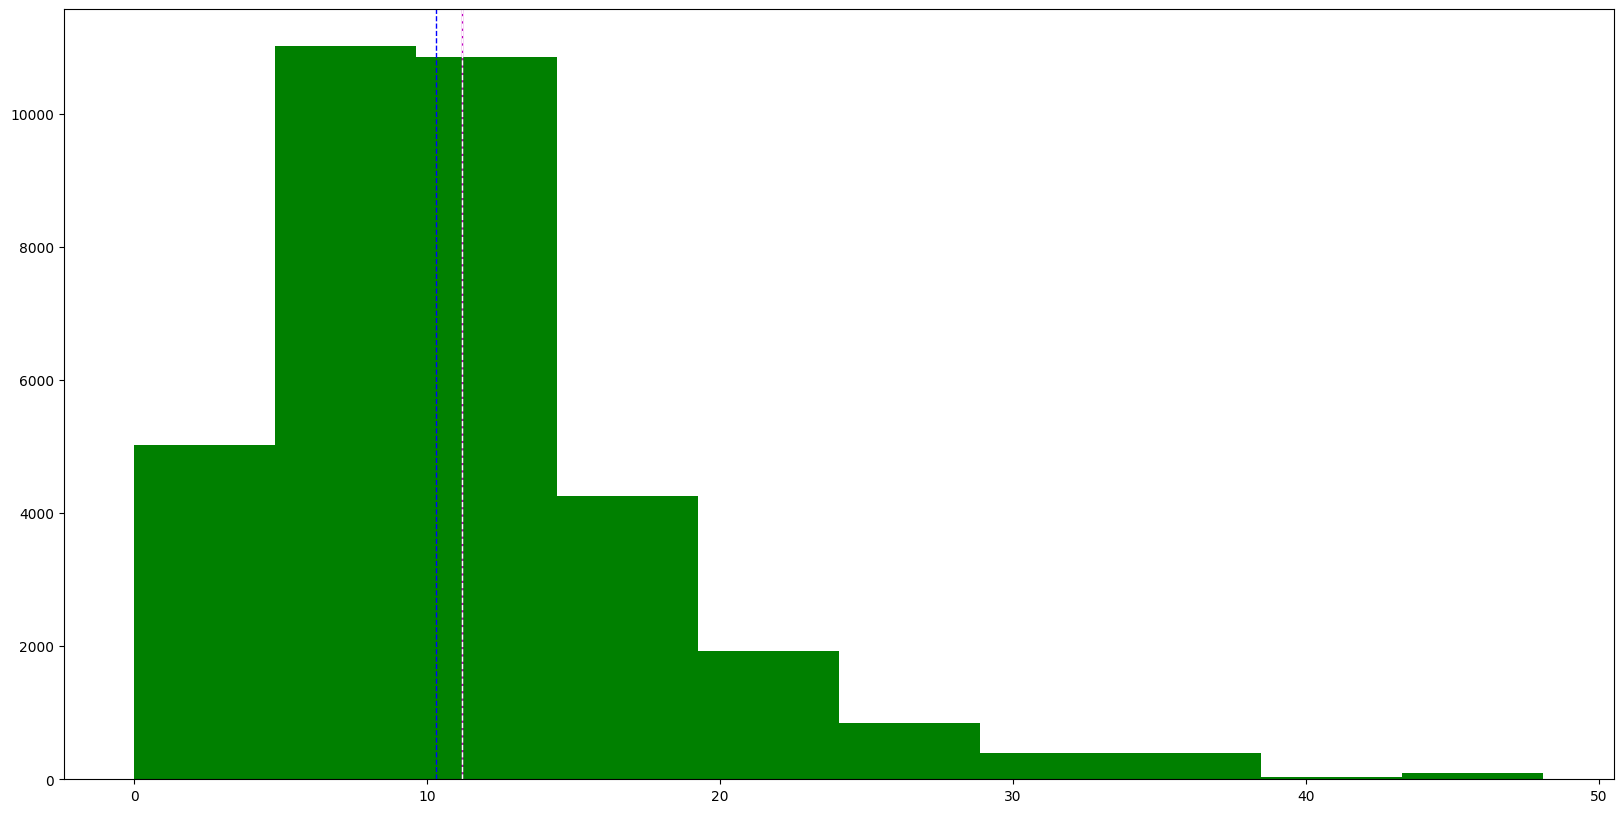

In [ ]:
plt.figure(figsize=(20,10)) #makes the plot wider
plt.hist(disdata, color='g') #plots a simple histogram
plt.axvline(disdata.mean(),color='m',linewidth=1)
plt.axvline(disdata.median(),color='b',linestyle='dashed', linewidth=1)
plt.axvline(disdata.mode()[0], color='w',linestyle='dashed', linewidth=1)

*In the above histogrm we can see that the seocnd bin with class limits (4.81, 9.62) has the most number of observations.
*A bulk of the observation lie within the first four classes. The rest of the six classes contain only a very few observation.
*In this case we are measuring distances.We can safely say based on visual observation that most of  the distance present on the data are less than 20kms.
*There are a very few distances that are more than 20 kms. Once we pass the 30km point the number of observations drops further.
*From the above figure we can see that the mean is represented by the magenta line and the mode by the white line. The median is represented by the blue line.
*We can see from the above figure that the mode and the mean are very close to each other and that the median is lower than both. *italicized text*


Now we have an idea of how the dat is distributed
We can Plot Cumulative Distribution

<ipython-input-21-2204f2f45c6a>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(disdata,hist_kws=dict(cumulative=True), kde_kws=dict(cumulative=True))


<Axes: xlabel='Distance', ylabel='Density'>

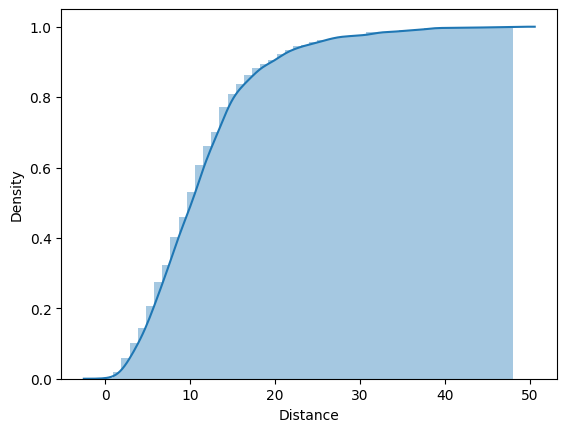

In [ ]:
#cumulative Distribution
sns.distplot(disdata,hist_kws=dict(cumulative=True), kde_kws=dict(cumulative=True))

**Multivariate analysis**
multivariate analysis is performed to understand interaction between different fields in the dataset(or) finding interactions between variables more than 2
ex: Pairplot, 3D scatter plot

**Scatter Plot**
A scatter plot gives us an idea of the association between two variables

In [ ]:
data.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [ ]:
data=data.dropna()

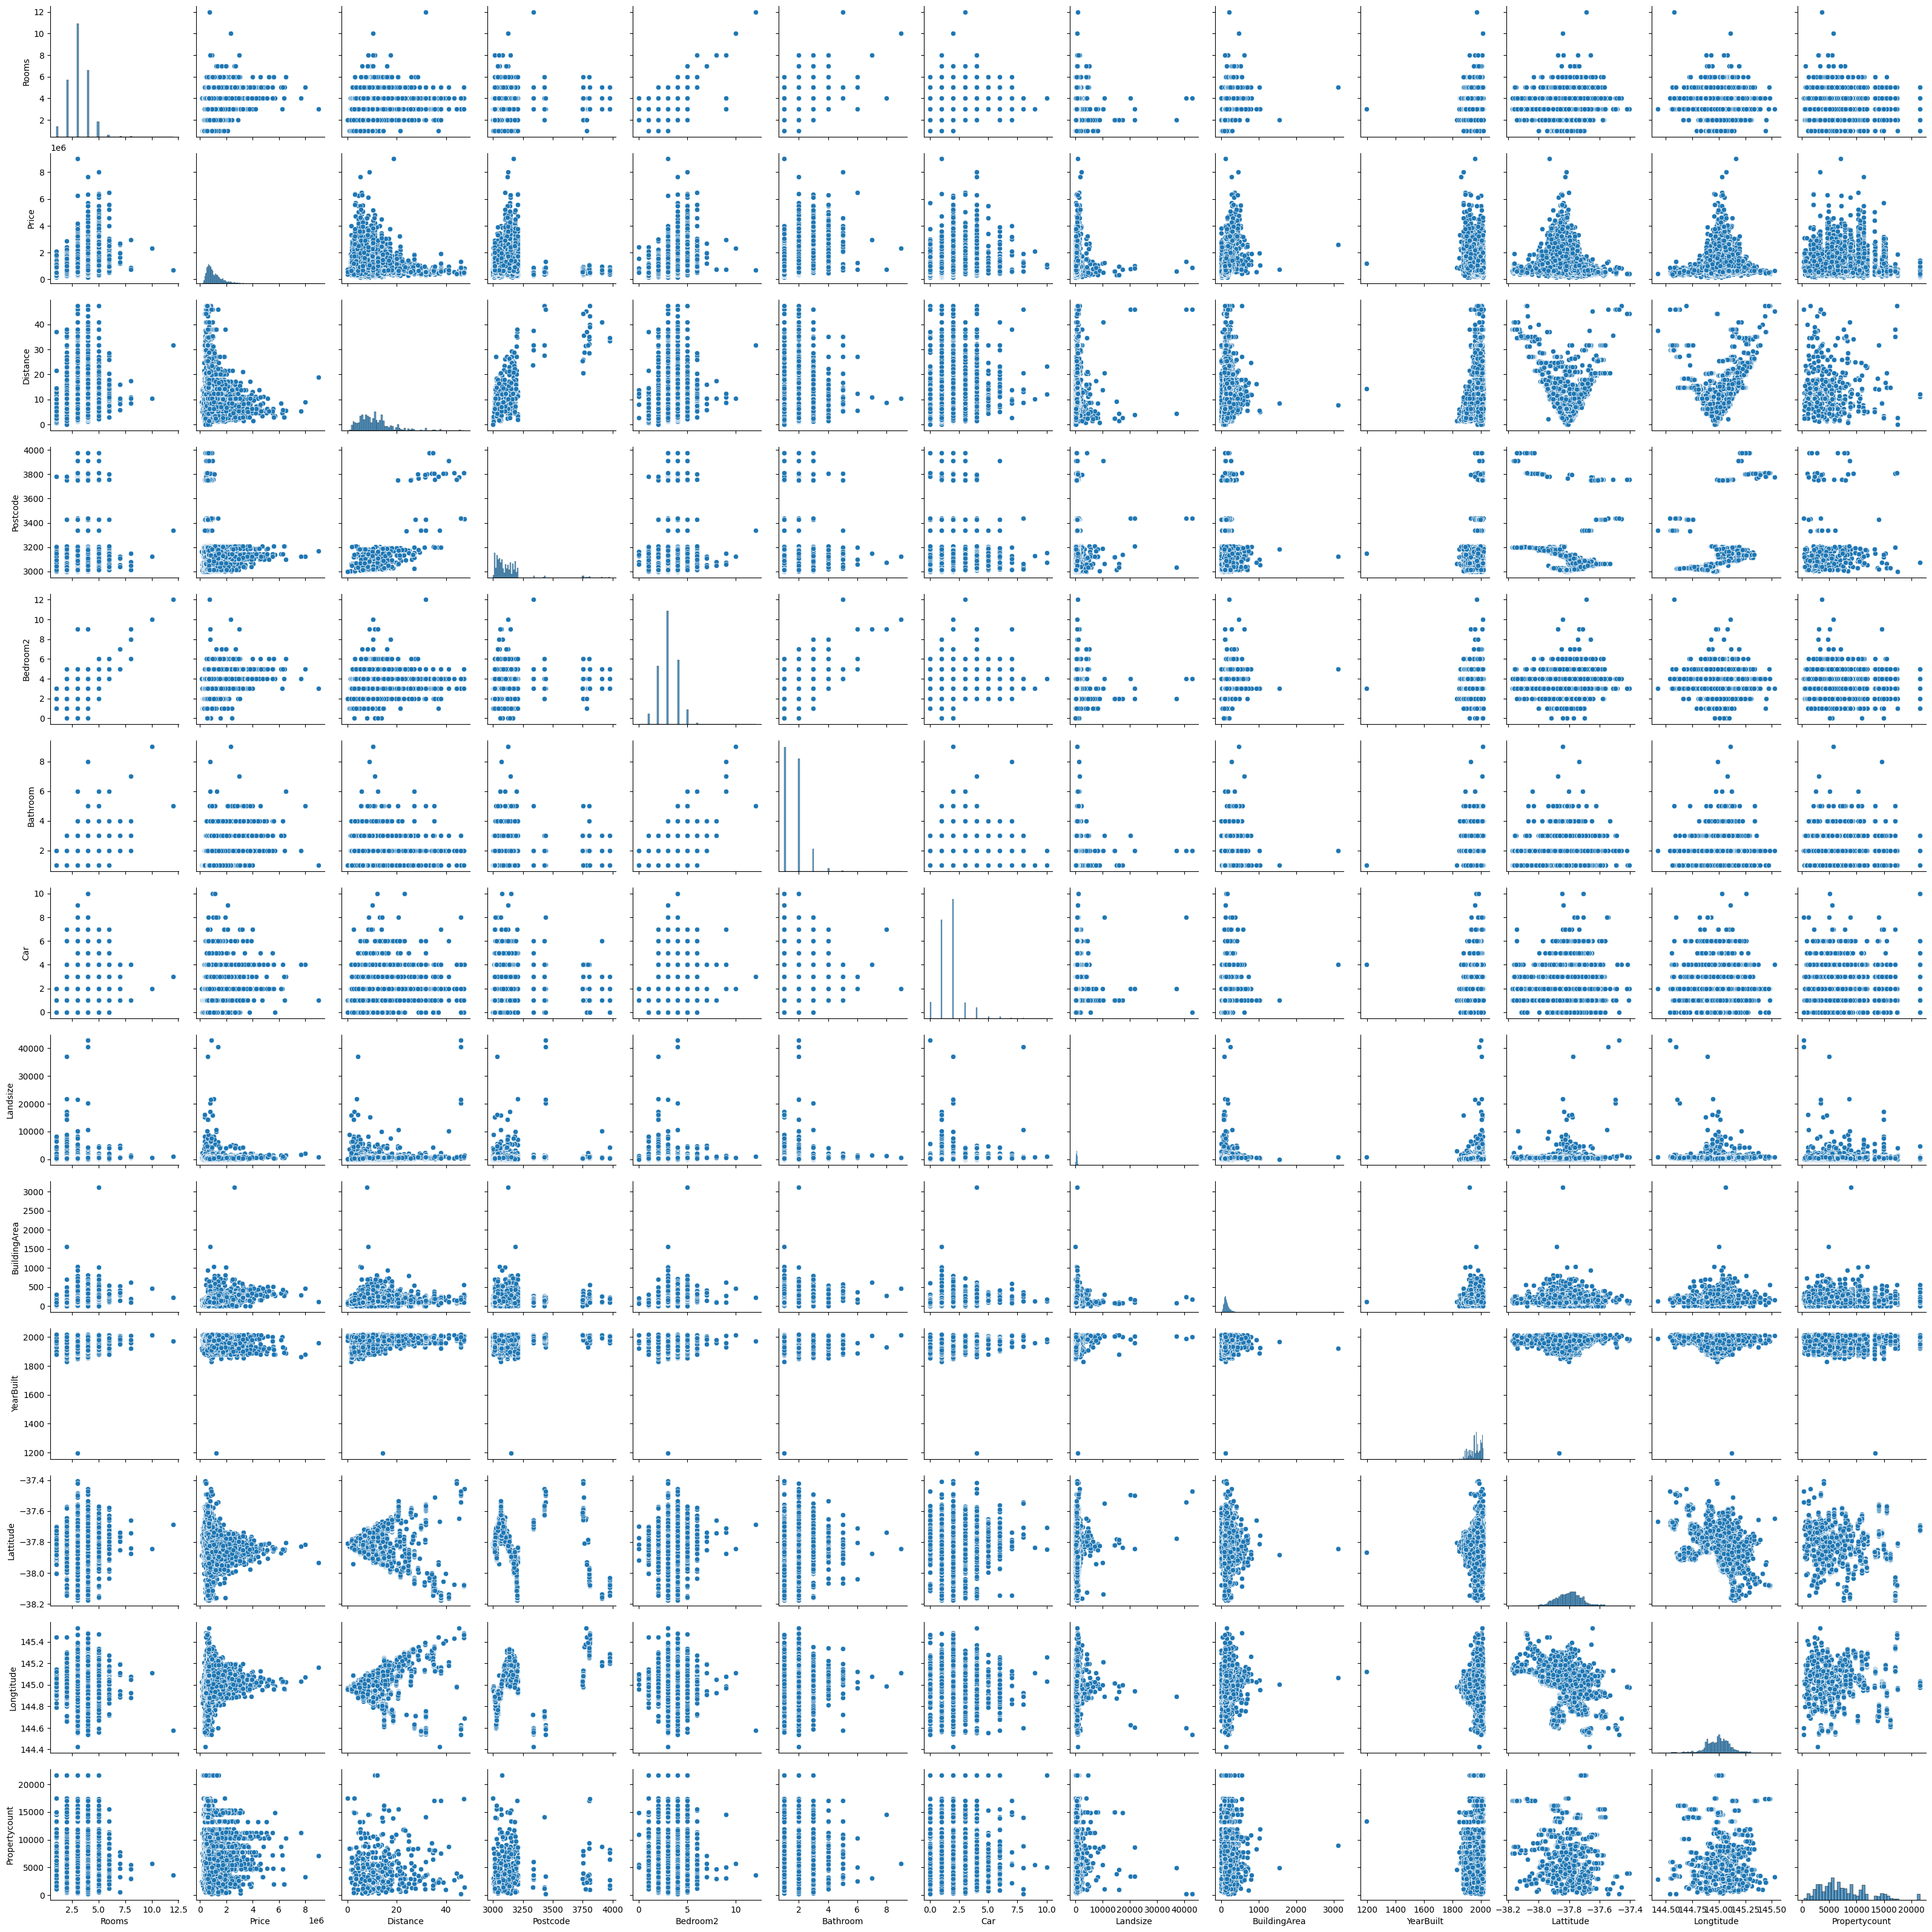

In [ ]:
sns.pairplot(data)

In the above plot scatter diagrams are plotted for all the numerical columns In the dataset. A scatter plot is a visual representation of the degree of correlation between any two columns. The pair plot function in seaborn makes It very easy to generate joint scatter plots for all the columns in the data.

A scatter plot can also be plotted for two Individual columns:

<Axes: xlabel='Price', ylabel='Distance'>

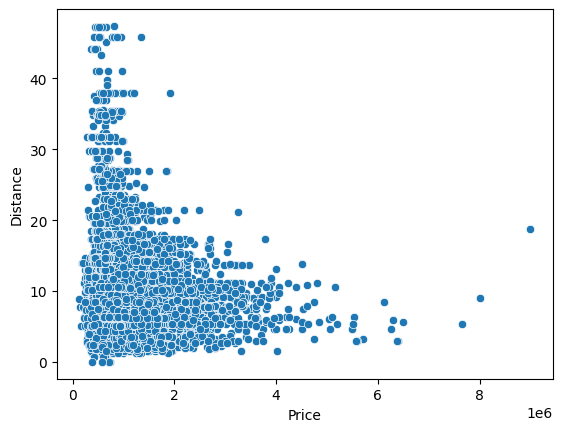

In [ ]:
sns.scatterplot(x='Price', y='Distance', data=data) #Pots the scatter plot using two variables

In [ ]:
# Select only the numerical columns for correlation calculation
data_numeric = data.select_dtypes(include=['number'])
data_numeric.corr() #displays the correlation between every possible pair of attributes as a dataframes

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
Rooms,1.000000,0.475074,0.276585,0.084236,0.964465,0.624070,0.401423,0.101158,0.606738,0.006935,0.018758,0.083016,-0.082797
Price,0.475074,1.000000,-0.231212,0.046033,0.460880,0.463501,0.209464,0.058375,0.507284,-0.313664,-0.224255,0.212174,-0.059720
Distance,0.276585,-0.231212,1.000000,0.489537,0.283460,0.122132,0.259374,0.138559,0.135509,0.313383,-0.055317,0.163941,-0.003247
Postcode,0.084236,0.046033,0.489537,1.000000,0.087286,0.111617,0.055531,0.069623,0.077091,0.089913,-0.195081,0.358005,0.032758
Bedroom2,0.964465,0.460880,0.283460,0.087286,1.000000,0.626493,0.405570,0.101035,0.595299,0.016310,0.022745,0.082671,-0.081392
Bathroom,0.624070,0.463501,0.122132,0.111617,0.626493,1.000000,0.310962,0.075939,0.553855,0.192914,-0.041859,0.109268,-0.058324
Car,0.401423,0.209464,0.259374,0.055531,0.405570,0.310962,1.000000,0.123498,0.317593,0.139255,0.015139,0.035589,-0.031285
Landsize,0.101158,0.058375,0.138559,0.069623,0.101035,0.075939,0.123498,1.000000,0.083229,0.037753,0.042484,-0.008196,-0.032548
BuildingArea,0.606738,0.507284,0.135509,0.077091,0.595299,0.553855,0.317593,0.083229,1.000000,0.059936,-0.034626,0.097635,-0.059024
YearBuilt,0.006935,-0.313664,0.313383,0.089913,0.016310,0.192914,0.139255,0.037753,0.059936,1.000000,0.100030,-0.026886,0.017224


<Axes: >

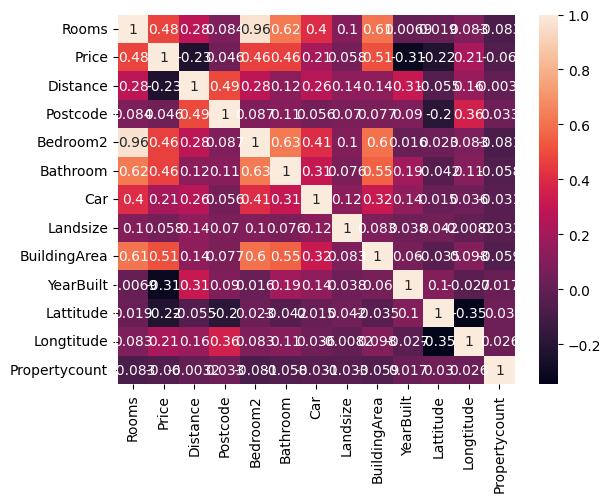

In [ ]:
#The same can be represented graphically using a the heatmap function in seaborn
sns.heatmap(data_numeric.corr(),annot=True) #plot the correlation coefficient as a heatmap

Another way of looking at multivariate scatter plot is to use the hue option in the scatterplot() function in seaborn.

<Axes: xlabel='Distance', ylabel='Price'>

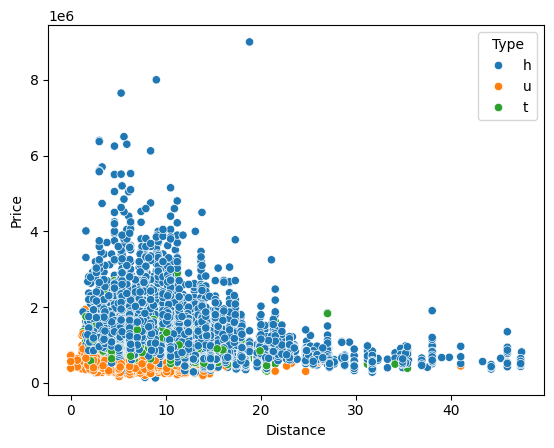

In [ ]:
sns.scatterplot(x='Distance', y='Price', hue='Type', data=data)